# Introduction to Artificial Neural Networks

**Objectives**

- Understand the Perceptron Learning Algorithm
- Implement the Perceptron Learning Algorithm with NumPy
- Understand a Multi-Layer Perceptron Classifier
- Implement Backpropagation


### The Neural Network

<center>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png" />
</center>

### The Artificial Neural Network

<center>
    <img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/560px-Colored_neural_network.svg.png" width = 50%/>
</center>

### The Perceptron



In [1]:
#!pip install graphviz

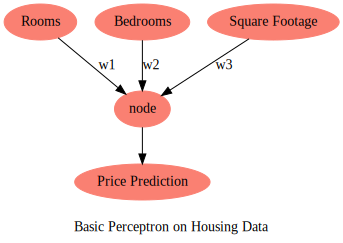

In [1]:
from graphviz import Digraph

dot = Digraph(comment='The Perceptron', node_attr={'color':'salmon', 'style':'filled'})

dot.attr('node')
dot.node('x1', 'Rooms')
dot.node('x2', 'Bedrooms')
dot.node('x3', 'Square Footage')
dot.node('neuron', 'node')
dot.node('output', 'Price Prediction')

dot.edge('x1', 'neuron', label = 'w1')
dot.edge('x2', 'neuron', label = 'w2')
dot.edge('x3', 'neuron', label = 'w3')
dot.edge('neuron', 'output')
# dot.edge('B', 'L', constraint='false')

dot.attr(label=r'\nBasic Perceptron on Housing Data')
dot

### Implementing with NumPy



In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#set up our data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [4]:
#subset no and yes
nos = X[y == 0]
yesses = X[y == 1]

Text(0.5, 1.0, 'Can we separate?')

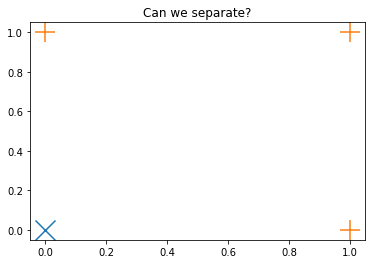

In [5]:
#plot our examples
plt.scatter(nos[:, 0], nos[:, 1], marker = 'x', s = 400)
plt.scatter(yesses[:, 0], yesses[:, 1], marker = '+', s = 400)
plt.title('Can we separate?')

In [6]:
#examine our X
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [7]:
#intercepts
b = np.ones((X.shape[0], 1))*-1
b

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [8]:
#concatenate ones on front
np.concatenate((b, X), axis = 1)

array([[-1.,  0.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

In [9]:
#reconsider X
X = np.concatenate((b, X), axis = 1)

### Example by Hand

Consider our feature matrix X and the weight array:

```python
w = np.array([-0.05, -0.02, 0.02])
```

Our goal is to construct the classification for a basic neural net represented below.

In [10]:
X

array([[-1.,  0.,  0.],
       [-1.,  0.,  1.],
       [-1.,  1.,  0.],
       [-1.,  1.,  1.]])

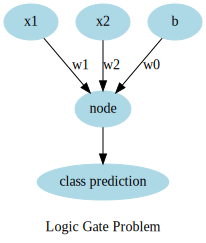

In [11]:
dot = Digraph(comment='The Perceptron', node_attr={'color':'lightblue', 'style':'filled'})

dot.attr('node')
dot.node('x1', 'x1')
dot.node('x2', 'x2')
dot.node('b', 'b')
dot.node('neuron', 'node')
dot.node('output', 'class prediction')

dot.edge('x1', 'neuron', label = 'w1')
dot.edge('x2', 'neuron', label = 'w2')
dot.edge('b', 'neuron', label = 'w0')

dot.edge('neuron', 'output')
# dot.edge('B', 'L', constraint='false')

dot.attr(label=r'\nLogic Gate Problem')
dot

In [12]:
#create our weight array
w = np.array([-0.05, -0.02, 0.02])

In [13]:
#explore the product
X@w

array([0.05, 0.07, 0.03, 0.05])

In [14]:
#basic threshold function -- aka activation function
#if x > 0 -- 1 else 0
np.where(X@w > 0, 1, 0)

array([1, 1, 1, 1])

In [16]:
#save as preds
preds = np.where(X@w > 0, 1, 0)

### Weight Update

$$w = w + \alpha(y - \hat{y})x$$

In [18]:
#set up weights
w = np.array([-0.05, -0.02, 0.02])
for i in range(10):
    #perform our estimation
    preds = np.where(X@w > 0, 1, 0)
    print(preds)
    print(w)
    #weight update
    w += 0.1*(y - preds)@X

[1 1 1 1]
[-0.05 -0.02  0.02]
[0 0 0 0]
[ 0.05 -0.02  0.02]
[1 1 1 1]
[-0.25  0.18  0.22]
[1 1 1 1]
[-0.15  0.18  0.22]
[1 1 1 1]
[-0.05  0.18  0.22]
[0 1 1 1]
[0.05 0.18 0.22]
[0 1 1 1]
[0.05 0.18 0.22]
[0 1 1 1]
[0.05 0.18 0.22]
[0 1 1 1]
[0.05 0.18 0.22]
[0 1 1 1]
[0.05 0.18 0.22]


In [19]:
w

array([0.05, 0.18, 0.22])

In [37]:
#make predictions
preds = np.where(X@w > 0, 1, 0)
preds

array([0, 1, 1, 1])

In [20]:
#zero weights
w = np.array([0., 0., 0.])
for i in range(10):
    #perform our estimation
    preds = np.where(X@w > 0, 1, 0)
    print(preds)
    #weight update
    w += 0.1*(y - preds)@X

[0 0 0 0]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]
[0 1 1 1]


In [21]:
#predictions
w

array([0.1, 0.2, 0.2])

### A Larger Example

In [22]:
from sklearn.datasets import make_blobs

In [38]:
X, y = make_blobs(centers = 2, center_box=(-3, 3), random_state = 22)

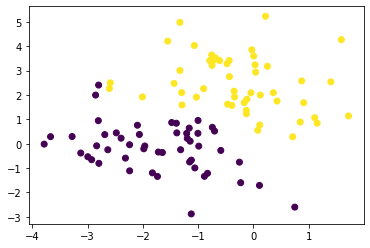

In [24]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [25]:
#weights, biases and X
biases = np.ones((X.shape[0], 1))
X = np.concatenate((biases, X), axis = 1)
weights = np.array([0., 0., 0.])

#loop 
for i in range(100):
     #apply the weights
    line = X@weights
     #make predictions
    preds = np.where(line > 0, 1, 0)
    #update the weights
    weights += 0.1*(y - preds)@X

In [26]:
weights

array([-1.4       ,  7.85617133,  9.69891443])

In [28]:
np.where(X@weights > 0, 1, 0)

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [31]:
sum(y == np.where(X@weights > 0, 1, 0))/len(y)

1.0

In [37]:
X.shape

(100, 3)

In [35]:
#perceptron function
def perceptron(X, y):
    biases = np.ones((X.shape[0], 1))
    X = np.concatenate((biases, X), axis = 1)
    weights = np.array([0., 0., 0.])

    #loop 
    for i in range(100):
         #apply the weights
        line = X@weights
         #make predictions
        preds = np.where(line > 0, 1, 0)
        #update the weights
        weights += 0.1*(y - preds)@X
    return np.where(X@weights > 0, 1, 0)

In [39]:
X, y = make_blobs(centers = 2, center_box=(-3, 3), random_state = 22)

In [41]:
#train model
preds = perceptron(X, y)

In [42]:
#make predictions
preds

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [43]:
from sklearn.metrics import accuracy_score

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
preds = perceptron(X_train, y_train)

In [49]:
accuracy_score(y_train, preds)

1.0

In [52]:
biases = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((biases, X_test), axis = 1)
X_test @ weights

array([ 8.76588046e+00, -2.43225990e+01, -7.68537023e-03, -7.11992331e-01,
       -6.75433760e+00, -9.37457697e+00,  1.89671020e+01,  2.72474003e+01,
       -3.81606924e+01,  9.02181846e+00,  3.42501853e+01,  1.38976543e+01,
       -4.57599117e+00, -2.13317760e+01,  3.64746891e+01, -2.53208342e+01,
       -1.88305907e+00, -2.44990431e+01,  9.53143180e+00,  2.73565130e+01,
       -5.14539056e+00, -1.71007584e+01, -7.96592349e+00,  3.35444540e+01,
       -1.89001202e+01])

In [54]:
accuracy_score(y_test, np.where(X_test @ weights > 0, 1, 0))

1.0

In [44]:
#check the accuracy
accuracy_score(y, preds)

1.0

Text(0, 0.5, 'X2')

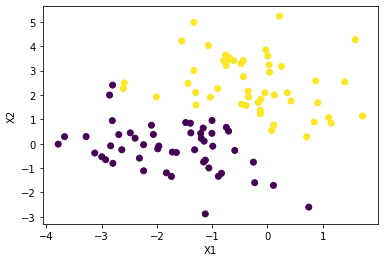

In [45]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('X1')
plt.ylabel('X2')

### Using sklearn

In [55]:
from sklearn.linear_model import Perceptron

In [56]:
perceptron = Perceptron()

In [57]:
perceptron.fit(X, y)

Perceptron()

In [58]:
perceptron.score(X, y)

0.99

### The Multilayer Perceptron



<center>
<img src = "https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width = 40% />
 </center>

### MLP with `sklearn`

In [59]:
#load in classifier
from sklearn.neural_network import MLPClassifier

In [60]:
import pandas as pd

In [61]:
#fruit data
fruits = pd.read_csv('data/apples_and_oranges.csv')

FileNotFoundError: [Errno 2] File data/apples_and_oranges.csv does not exist: 'data/apples_and_oranges.csv'

In [ ]:
fruits.head()

In [ ]:
X, y = fruits[['Weight', 'Size']], fruits.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [ ]:
#basic parameters
mlp = MLPClassifier(hidden_layer_sizes=(100,))

In [ ]:
#build classifier
mlp.fit(X_train, y_train)

In [ ]:
#look at weights
# mlp.coefs_[:10]

In [ ]:
mlp.score(X_train, y_train)

In [ ]:
mlp.score(X_test, y_test)